In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv", header = None)

india_df = pd.DataFrame(df[df[1] == "India"].transpose().values, df.iloc[0].values)

india_df.columns=['Cases'] 

india_df = india_df.drop(labels=["Province/State", "Country/Region", "Lat", "Long"], axis=0)

india_df.index = pd.to_datetime(india_df.index)
india_df['Cases'] = india_df['Cases'].astype(float)

india_df['New Cases']= india_df['Cases']-india_df['Cases'].shift(1)

test = india_df[-43:-11]

india_df = india_df[:-43]

print(india_df.tail())

print(test)

                 Cases  New Cases
2021-10-20  34127450.0    18454.0
2021-10-21  34143236.0    15786.0
2021-10-22  34159562.0    16326.0
2021-10-23  34175468.0    15906.0
2021-10-24  34189774.0    14306.0
                 Cases  New Cases
2021-10-25  34202202.0    12428.0
2021-10-26  34215653.0    13451.0
2021-10-27  34231809.0    16156.0
2021-10-28  34246157.0    14348.0
2021-10-29  34260470.0    14313.0
2021-10-30  34273300.0    12830.0
2021-10-31  34285814.0    12514.0
2021-11-01  34296237.0    10423.0
2021-11-02  34308140.0    11903.0
2021-11-03  34321025.0    12885.0
2021-11-04  34333754.0    12729.0
2021-11-05  34344683.0    10929.0
2021-11-06  34355509.0    10826.0
2021-11-07  34366987.0    11478.0
2021-11-08  34377113.0    10126.0
2021-11-09  34388579.0    11466.0
2021-11-10  34401670.0    13091.0
2021-11-11  34414186.0    12516.0
2021-11-12  34426036.0    11850.0
2021-11-13  34437307.0    11271.0
2021-11-14  34447536.0    10229.0
2021-11-15  34456401.0     8865.0
2021-11-16  34

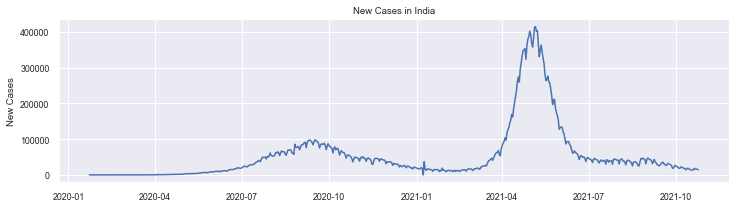

In [4]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

ax = sns.lineplot(x = india_df.index, y  = "New Cases", data = india_df)

plt.title("New Cases in India")
plt.show()

In [5]:
# Dropping New Cases = 0 Values
india_df[india_df["New Cases"] == 0]
india_df.drop(india_df.index[india_df["New Cases"] == 0], axis = 0, inplace = True)
india_df.dropna()

,Cases,New Cases
2020-01-30,1.0,1.0
2020-02-02,2.0,1.0
2020-02-03,3.0,1.0
2020-03-02,5.0,2.0
2020-03-04,28.0,23.0
...,...,...
2021-10-20,34127450.0,18454.0
2021-10-21,34143236.0,15786.0
2021-10-22,34159562.0,16326.0
2021-10-23,34175468.0,15906.0


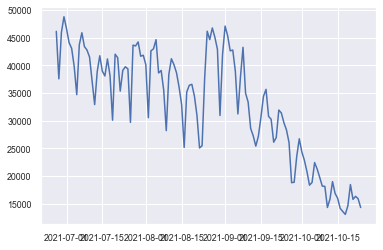

In [6]:
current_death_plot = india_df[-120:]
plt.plot(current_death_plot["New Cases"])

In [7]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
#test_result=adfuller(total_death_plot.iloc[-100:]['new_cases'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(current_death_plot['New Cases'])

ADF Test Statistic : -0.023305894127867936
p-value : 0.9565617402760928
#Lags Used : 11
Number of Observations Used : 108
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# PACF and ACF Plots

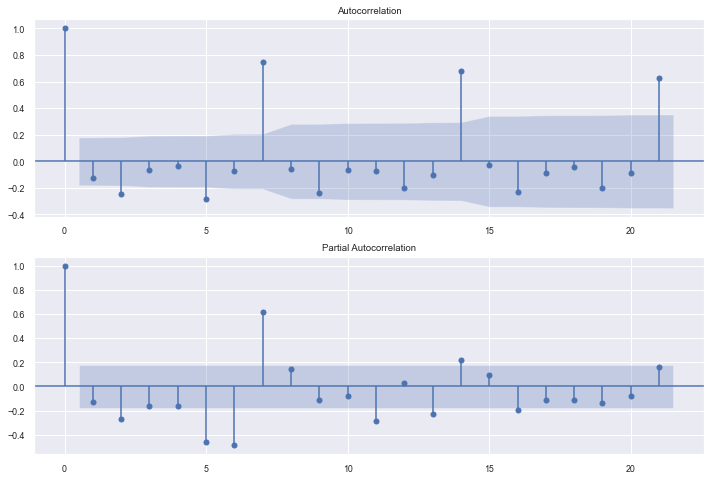

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(current_death_plot['New Cases'].diff()[1:], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(current_death_plot['New Cases'].diff()[1:], ax=ax2)

## Plots indicate a ARIMA(2, 1, 2) Model


In [9]:
from pmdarima import auto_arima

import warnings

warnings.filterwarnings("ignore")


stepwise_fit = auto_arima(current_death_plot["New Cases"], stepwise=True, trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2357.049, Time=0.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2357.946, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2355.116, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2354.348, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2356.323, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2355.603, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2358.299, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2360.802, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2352.450, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2348.822, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2353.451, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2350.847, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2352.729, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2353.805, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1171.411
Date:                Wed, 08 Dec 2021   AIC                           2348.822
Time:                        09:49:38   BIC                           2357.159
Sample:                             0   HQIC                          2352.207
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5706      0.137      4.154      0.000       0.301       0.840
ma.L1         -0.8151      0.122     -6.697      0.000      -1.054      -0.577
sigma2      2.095e+07   1.41e-09   1.48e+16      0.000    2.09e+07    2.09e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 4.51
Prob(Q):                              0.62   Prob(JB):                         0.10
Heteroskedasticity (H):               0.26   Skew:                             0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.8e+32. Standard errors may be unstable.
"""

In [10]:
from statsmodels.tsa.arima.model import ARIMA

testing_data = test

model=ARIMA(current_death_plot['New Cases'],order=(2, 1, 2))
model_fit=model.fit()

model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              New Cases   No. Observations:                  120
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1170.980
Date:                Wed, 08 Dec 2021   AIC                           2351.959
Time:                        09:49:40   BIC                           2365.855
Sample:                    06-27-2021   HQIC                          2357.602
                         - 10-24-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4160      0.143     -2.901      0.004      -0.697      -0.135
ar.L2          0.5542      0.135      4.095      0.000       0.289       0.819
ma.L1          0.1851      0.167      1.107      0.268      -0.143       0.513
ma.L2         -0.8110      0.139     -5.822      0.000      -1.084      -0.538
sigma2      2.028e+07      6e-09   3.38e+15      0.000    2.03e+07    2.03e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 5.05
Prob(Q):                              0.63   Prob(JB):                         0.08
Heteroskedasticity (H):               0.26   Skew:                             0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.3e+31. Standard errors may be unstable.
"""

In [11]:
start = len(current_death_plot)
end = len(current_death_plot) + len(testing_data) -1
pred = model_fit.predict(start = start, end = end, typ = 'levels')

index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')

pred.index = index_future_dates
#print(current_death_plot.index[start: end + 1])
print(pred)

2021-10-25    14967.810879
2021-10-26    14951.795293
2021-10-27    15325.246212
2021-10-28    15161.025080
2021-10-29    15436.310411
2021-10-30    15230.784882
2021-10-31    15468.846326
2021-11-01    15255.913150
2021-11-02    15476.425738
2021-11-03    15266.686920
2021-11-04    15476.144819
2021-11-05    15272.774815
2021-11-06    15473.456736
2021-11-07    15277.267015
2021-11-08    15470.098319
2021-11-09    15281.153688
2021-11-10    15466.620271
2021-11-11    15284.754530
2021-11-12    15463.194819
2021-11-13    15288.175080
2021-11-14    15459.873513
2021-11-15    15291.452386
2021-11-16    15456.669513
2021-11-17    15294.601508
2021-11-18    15453.583846
2021-11-19    15297.630364
2021-11-20    15450.613789
2021-11-21    15300.544477
2021-11-22    15447.755536
2021-11-23    15303.348489
2021-11-24    15445.005045
2021-11-25    15306.046654
Freq: D, Name: predicted_mean, dtype: float64


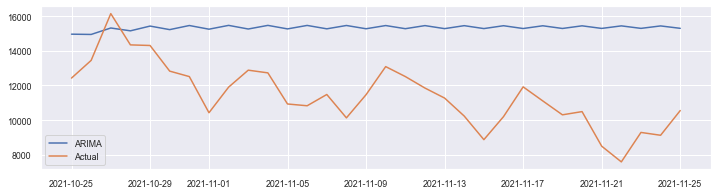

In [12]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

plt.plot(pred, label ='ARIMA')
plt.plot(test["New Cases"], label ='Actual')

plt.legend(loc ="best")

## SARIMA

In [13]:
training_data1 = india_df['New Cases'][-500:]

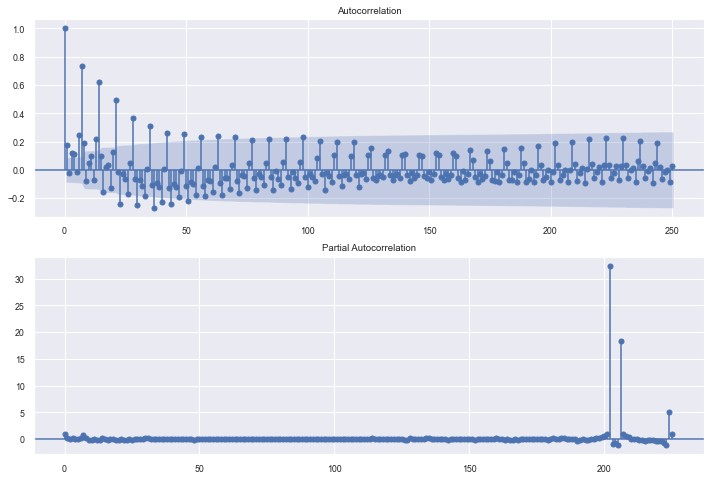

In [14]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(training_data1.diff()[1:], ax=ax1, lags = 250)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(training_data1.diff()[1:], ax=ax2, lags = 225)

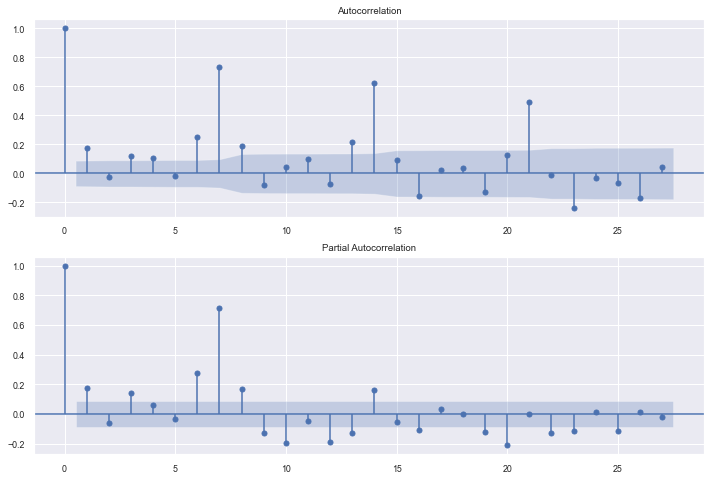

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(training_data1.diff()[1:], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(training_data1.diff()[1:], ax=ax2)

## Plots indicate SARIMA(1, 1, 1)(0, 0, 2, 3)

In [16]:
from pmdarima import auto_arima

import warnings

warnings.filterwarnings("ignore")


stepwise_fit = auto_arima(current_death_plot["New Cases"], seasona=True, m = 3, stepwise=True, trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[3] intercept   : AIC=2338.287, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[3] intercept   : AIC=2357.946, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[3] intercept   : AIC=2356.787, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[3] intercept   : AIC=2355.707, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[3]             : AIC=2356.323, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[3] intercept   : AIC=2336.436, Time=0.40 sec
 ARIMA(2,1,2)(0,0,0)[3] intercept   : AIC=2357.049, Time=0.41 sec
 ARIMA(2,1,2)(0,0,2)[3] intercept   : AIC=2338.428, Time=0.60 sec
 ARIMA(2,1,2)(1,0,0)[3] intercept   : AIC=2339.600, Time=0.38 sec
 ARIMA(2,1,2)(1,0,2)[3] intercept   : AIC=2333.974, Time=0.78 sec
 ARIMA(2,1,2)(2,0,2)[3] intercept   : AIC=2334.535, Time=0.94 sec
 ARIMA(2,1,2)(2,0,1)[3] intercept   : AIC=2333.375, Time=0.78 sec
 ARIMA(2,1,2)(2,0,0)[3] intercept   : AIC=2335.484, Time=0.53 sec
 ARIMA(1,1,2)(2,0,1)[3] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,1)(2,0,1)[3] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  120
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 3)   Log Likelihood               -1157.687
Date:                             Wed, 08 Dec 2021   AIC                           2333.375
Time:                                     09:50:10   BIC                           2358.387
Sample:                                          0   HQIC                          2343.531
                                             - 120                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -836.4813   1293.665     -0.647      0.518   -3372.018    1699.056
ar.L1         -0.3337      0.067     -4.981      0.000      -0.465      -0.202
ar.L2         -0.8274      0.050    -16.601      0.000      -0.925      -0.730
ma.L1          0.0459      0.085      0.538      0.591      -0.121       0.213
ma.L2          0.7547      0.080      9.433      0.000       0.598       0.911
ar.S.L3       -1.1948      0.097    -12.314      0.000      -1.385      -1.005
ar.S.L6       -0.3877      0.049     -7.885      0.000      -0.484      -0.291
ma.S.L3        0.8663      0.109      7.958      0.000       0.653       1.080
sigma2      1.542e+07      0.071   2.18e+08      0.000    1.54e+07    1.54e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.76   Prob(JB):                         0.56
Heteroskedasticity (H):               0.26   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.41e+24. Standard errors may be unstable.
"""

In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


model=SARIMAX(training_data1,order=(2,1,2), seasonal_order = (2, 0, 1, 3))
model_fit1=model.fit(disp=0)
model_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                           New Cases   No. Observations:                  500
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 3)   Log Likelihood               -5156.239
Date:                             Wed, 08 Dec 2021   AIC                          10328.477
Time:                                     09:50:14   BIC                          10362.178
Sample:                                          0   HQIC                         10341.702
                                             - 500                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1934      0.060      3.209      0.001       0.075       0.312
ar.L2          0.7510      0.050     15.065      0.000       0.653       0.849
ma.L1          0.0308      0.055      0.558      0.577      -0.077       0.139
ma.L2         -0.7845      0.038    -20.717      0.000      -0.859      -0.710
ar.S.L3        0.8249      0.074     11.115      0.000       0.679       0.970
ar.S.L6        0.0581      0.048      1.207      0.227      -0.036       0.152
ma.S.L3       -0.9412      0.063    -14.980      0.000      -1.064      -0.818
sigma2       6.07e+07    6.6e-10   9.19e+16      0.000    6.07e+07    6.07e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.56   Jarque-Bera (JB):               792.42
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               1.46   Skew:                            -0.14
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.56e+32. Standard errors may be unstable.
"""

In [18]:
start = len(training_data1)
end = len(training_data1) + len(testing_data) -1
pred1 = model_fit1.predict(start = start, end = end, typ = 'levels')

index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')

pred1.index = index_future_dates
#print(current_death_plot.index[start: end + 1])
print(pred1)

2021-10-25    13986.655112
2021-10-26    13776.453393
2021-10-27    14239.046870
2021-10-28    13519.468865
2021-10-29    13734.254151
2021-10-30    13736.585592
2021-10-31    13378.926652
2021-11-01    13378.087328
2021-11-02    13565.887287
2021-11-03    13135.318373
2021-11-04    13248.376606
2021-11-05    13352.603442
2021-11-06    13042.893613
2021-11-07    13110.748669
2021-11-08    13252.457392
2021-11-09    12961.610863
2021-11-10    13055.806807
2021-11-11    13177.086579
2021-11-12    12942.640938
2021-11-13    13027.566728
2021-11-14    13154.083435
2021-11-15    12949.801090
2021-11-16    13040.186487
2021-11-17    13158.967131
2021-11-18    12989.432375
2021-11-19    13076.895216
2021-11-20    13193.216349
2021-11-21    13049.622990
2021-11-22    13136.843796
2021-11-23    13247.686240
2021-11-24    13128.319336
2021-11-25    13213.074122
Freq: D, Name: predicted_mean, dtype: float64


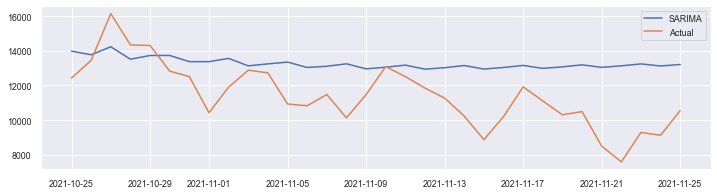

In [19]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

plt.plot(pred1, label ='SARIMA')
plt.plot(test["New Cases"], label ='Actual')

plt.legend(loc ="best")

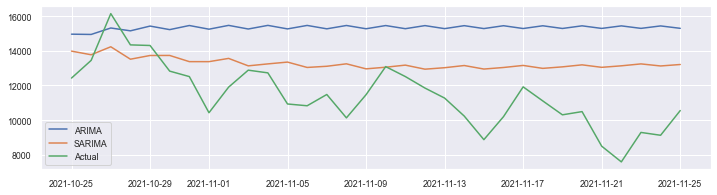

In [20]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

plt.plot(pred, label ='ARIMA')
plt.plot(pred1, label ='SARIMA')
plt.plot(test["New Cases"], label ='Actual')

plt.legend(loc ="best")

In [21]:
# For 1 Day Ahead Forecast
from math import sqrt

print("1 Day Ahead Forecast")
print("ARIMA -", sqrt((pred[0] - test.iloc[0]["New Cases"])**2))
print("SARIMA -", sqrt((pred1[0] - test.iloc[0]["New Cases"])**2))

1 Day Ahead Forecast
ARIMA - 2539.8108792725143
SARIMA - 1558.655111736094


In [22]:
# For 7 Day Ahead Forecast
from statsmodels.tools.eval_measures import rmse

print("7 Day Ahead Forecast")
print("ARIMA - ", rmse(pred[:8], test.iloc[:8]["New Cases"]))
print("SARIMA - ", rmse(pred1[:8], test.iloc[:8]["New Cases"]))

7 Day Ahead Forecast
ARIMA -  2479.111436001341
SARIMA -  1480.45526100939


In [23]:
# For 1 Month Ahead Forecast
from statsmodels.tools.eval_measures import rmse

print("1 Month Ahead Forecast")
print("ARIMA - ", rmse(pred, test["New Cases"]))
print("SARIMA - ", rmse(pred1, test["New Cases"]))

1 Month Ahead Forecast
ARIMA -  4326.883389885809
SARIMA -  2467.4909971611096


## Predicting Vaccination Rate

In [36]:
vac_url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/country_data/India.csv"

vac_df = pd.read_csv(vac_url)

vac_df.index = pd.to_datetime(vac_df.date)
vac_df = vac_df.drop(labels=["date","vaccine", "location", "people_vaccinated", "people_fully_vaccinated", "source_url","total_boosters"], axis=1)


vac_df.tail()

train_vac = vac_df.iloc[:-43]
test_vac = vac_df.iloc[-43:-11]

#print(train_vac.tail())
test_vac

,total_vaccinations
date,
2021-10-25,1024149949
2021-10-26,1030850079
2021-10-27,1036568410
2021-10-28,1042458533
2021-10-29,1051708635
2021-10-30,1058489433
2021-10-31,1062631351
2021-11-01,1067654329
2021-11-02,1069718646


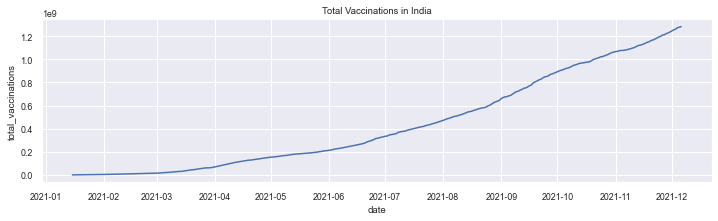

In [37]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

ax = sns.lineplot(x = vac_df.index, y  = "total_vaccinations", data = vac_df)

plt.title("Total Vaccinations in India")
plt.show()

In [38]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
#test_result=adfuller(total_death_plot.iloc[-100:]['new_cases'])


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(data):
    result=adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(vac_df["total_vaccinations"])

ADF Test Statistic : 1.2184618295984075
p-value : 0.996110987528662
#Lags Used : 12
Number of Observations Used : 302
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# PACF And ACF Plots

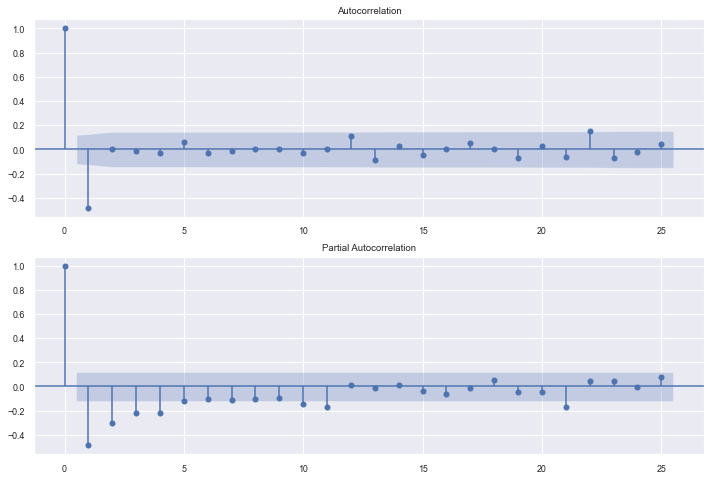

In [39]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_vac["total_vaccinations"].diff().diff()[2:], ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_vac["total_vaccinations"].diff().diff()[2:], ax=ax2)

# ARIMA(4, 2, 1)

In [40]:
from pmdarima import auto_arima

import warnings

warnings.filterwarnings("ignore")


stepwise_fit = auto_arima(train_vac["total_vaccinations"], d = 2, stepwise=True, trace = True, suppress_warnings = True)

stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=8647.305, Time=0.18 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=8783.396, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=8712.014, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=8642.913, Time=0.05 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=8644.747, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=8643.625, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=8645.432, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=8646.709, Time=0.06 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.600 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  272
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -4319.457
Date:                Wed, 08 Dec 2021   AIC                           8642.913
Time:                        09:51:47   BIC                           8650.110
Sample:                             0   HQIC                          8645.803
                                - 272                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8717      0.030    -29.120      0.000      -0.930      -0.813
sigma2      5.234e+12   2.71e-16   1.93e+28      0.000    5.23e+12    5.23e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               347.56
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):              20.27   Skew:                             1.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [41]:
from statsmodels.tsa.arima.model import ARIMA

testing_data = test

vac_model=ARIMA(train_vac["total_vaccinations"],order=(4, 2, 1))
vac_model_fit=vac_model.fit()

vac_model_fit.summary()

start = len(train_vac)
end = len(train_vac) + len(test_vac) -1
vac_pred = vac_model_fit.predict(start = start, end = end, typ = 'levels')

index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')

vac_pred.index = index_future_dates
#print(current_death_plot.index[start: end + 1])
print(vac_pred)

2021-10-25    1.028198e+09
2021-10-26    1.034166e+09
2021-10-27    1.040090e+09
2021-10-28    1.045928e+09
2021-10-29    1.051835e+09
2021-10-30    1.057742e+09
2021-10-31    1.063653e+09
2021-11-01    1.069565e+09
2021-11-02    1.075475e+09
2021-11-03    1.081385e+09
2021-11-04    1.087295e+09
2021-11-05    1.093206e+09
2021-11-06    1.099116e+09
2021-11-07    1.105026e+09
2021-11-08    1.110936e+09
2021-11-09    1.116846e+09
2021-11-10    1.122756e+09
2021-11-11    1.128666e+09
2021-11-12    1.134576e+09
2021-11-13    1.140486e+09
2021-11-14    1.146396e+09
2021-11-15    1.152306e+09
2021-11-16    1.158216e+09
2021-11-17    1.164126e+09
2021-11-18    1.170036e+09
2021-11-19    1.175947e+09
2021-11-20    1.181857e+09
2021-11-21    1.187767e+09
2021-11-22    1.193677e+09
2021-11-23    1.199587e+09
2021-11-24    1.205497e+09
2021-11-25    1.211407e+09
Freq: D, Name: predicted_mean, dtype: float64


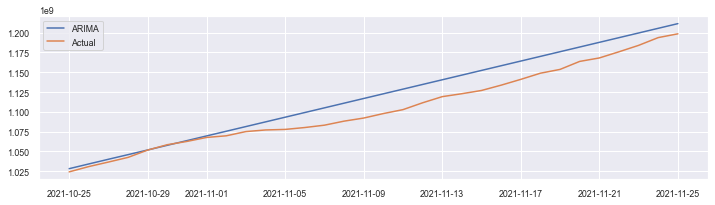

In [42]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

plt.plot(vac_pred, label ='ARIMA')
plt.plot(test_vac["total_vaccinations"], label ='Actual')

plt.legend(loc ="best")

In [43]:
# For 1 Month Ahead Forecast
from statsmodels.tools.eval_measures import rmse

print("1 Month Ahead Forecast")
print("ARIMA - ", rmse(vac_pred, test_vac["total_vaccinations"]))

1 Month Ahead Forecast
ARIMA -  17305161.435187403


## Comparing with Linear Regression and LSTM

In [48]:
lr_preds = [14951.222820,
   14608.777286,
   14266.331751,
   13923.886217,
   13581.440682,
   13238.995148,
   12896.549613,
   12554.104079,
   12211.658544,
   11869.213010,
   11526.767475,
   11184.321941,
   10841.876406,
   10499.430872,
   10156.985338,
   9814.539803,
   9472.094269,
   9129.648734,
   8787.203200,
   8444.757665,
   8102.312131,
   7759.866596,
   7417.421062,
    7074.975527,
    6732.529993,
    6390.084459,
    6047.638924,
    5705.193390,
    5362.747855,
    5020.302321,
    4677.856786,
    4335.411252]


lstm_preds = [14385.734 ,
       13227.582 ,
       13009.095 ,
       13324.954 ,
       13515.615 ,
       12987.39  ,
       12588.012 ,
       12578.196 ,
       12051.428 ,
       12218.358 ,
       12985.064 ,
       13302.065 ,
       13238.266 ,
       12950.536 ,
       12346.83  ,
       11411.994 ,
       11290.589 ,
       11919.214 ,
       12069.323 ,
       11870.315 ,
       11807.224 ,
       11006.287 ,
       10106.988 ,
       10141.106 ,
       10147.634 ,
       10729.8955,
       10305.1875,
       10193.467 ,
        9935.54  ,
        9257.092 ,
        9534.755 ,
       10048.459 ]

In [49]:
index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')
lr_df = pd.DataFrame(lr_preds)
lr_df.index = index_future_dates
lr_df.columns = ["New Cases"]
print(lr_df.head())

               New Cases
2021-10-25  14951.222820
2021-10-26  14608.777286
2021-10-27  14266.331751
2021-10-28  13923.886217
2021-10-29  13581.440682


In [50]:
index_future_dates = pd.date_range(start = '2021-10-25', end = '2021-11-25')
lstm_df = pd.DataFrame(lstm_preds)
lstm_df.index = index_future_dates
lstm_df.columns = ["New Cases"]
print(lstm_df.head())

            New Cases
2021-10-25  14385.734
2021-10-26  13227.582
2021-10-27  13009.095
2021-10-28  13324.954
2021-10-29  13515.615


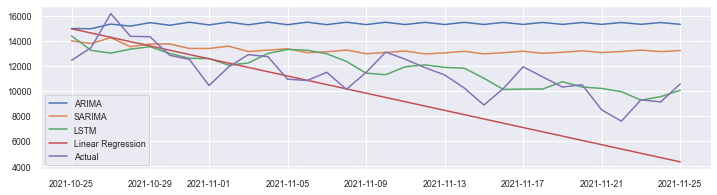

In [51]:
sns.set(font_scale=0.8)

plt.figure(figsize = (12, 3))

plt.plot(pred, label ='ARIMA')
plt.plot(pred1, label ='SARIMA')
plt.plot(lstm_df, label = 'LSTM')
plt.plot(lr_df, label = 'Linear Regression')
plt.plot(test["New Cases"], label ='Actual')

plt.legend(loc ="best")